# Simple Linear Regression

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv("Advertising.csv")

In [36]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [37]:
df["total_spend"] = df['TV'] + df['radio'] + df['newspaper'] # Feature Engineering

In [38]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

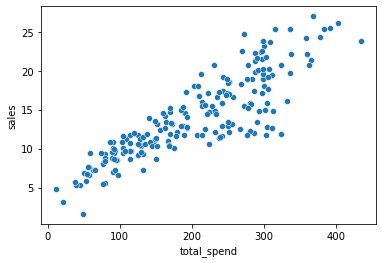

In [39]:
sns.scatterplot(data=df, x='total_spend', y = 'sales')

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

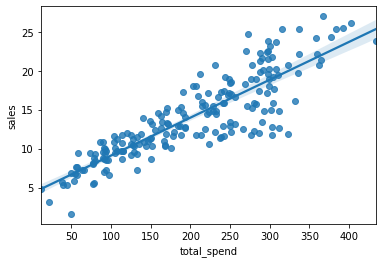

In [41]:
sns.regplot(data=df, x='total_spend', y = 'sales')  # Ordinary Least Square, best fit line

In [43]:
X = df['total_spend']
y = df['sales']

In [44]:
# y = mx +b
# y = B1x + B0
# help(np.polyfit)

In [64]:
np.polyfit(X, y, deg =1)

array([0.04868788, 4.24302822])

In [65]:
potential_spend = np.linspace(0, 500, 100)

In [66]:
predicted_sales = 0.04868788*potential_spend + 4.24302822

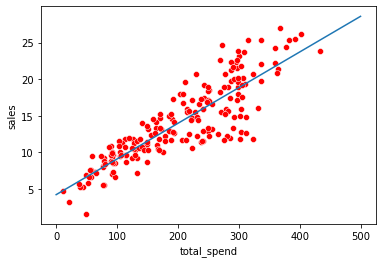

In [67]:
sns.scatterplot(data=df, x='total_spend', y = 'sales', color='red')
plt.plot(potential_spend, predicted_sales)

In [68]:
spend = 200

predicted_sales = 0.04868788*spend + 4.24302822

In [69]:
predicted_sales

13.98060422

In [70]:
np.polyfit(X, y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [71]:
# y = B1x + B0

# y = B3**3 +B2*x**2 + B1x + B0

In [72]:
pot_spend = np.linspace(0, 500, 100)

In [73]:
# y = B3**3 +B2*x**2 + B1x + B0
pred_sales = 3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend + 2.70495053e+00

In [74]:
pred_sales

array([ 2.70495053,  3.11474825,  3.51512186,  3.90630911,  4.28854779,
        4.66207567,  5.02713053,  5.38395013,  5.73277224,  6.07383466,
        6.40737513,  6.73363145,  7.05284138,  7.3652427 ,  7.67107318,
        7.97057059,  8.2639727 ,  8.5515173 ,  8.83344215,  9.10998503,
        9.38138371,  9.64787596,  9.90969955, 10.16709227, 10.42029188,
       10.66953616, 10.91506288, 11.15710981, 11.39591473, 11.63171541,
       11.86474963, 12.09525515, 12.32346975, 12.54963121, 12.77397729,
       12.99674578, 13.21817443, 13.43850104, 13.65796337, 13.87679919,
       14.09524628, 14.31354241, 14.53192536, 14.75063289, 14.96990278,
       15.18997281, 15.41108075, 15.63346437, 15.85736144, 16.08300974,
       16.31064705, 16.54051112, 16.77283975, 17.0078707 , 17.24584174,
       17.48699065, 17.73155521, 17.97977318, 18.23188233, 18.48812045,
       18.74872531, 19.01393467, 19.28398632, 19.55911802, 19.83956755,
       20.12557268, 20.41737119, 20.71520085, 21.01929943, 21.32

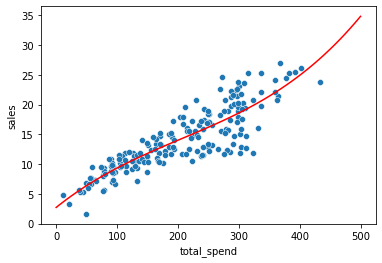

In [76]:
sns.scatterplot(data=df, x='total_spend', y = 'sales')
plt.plot(pot_spend, pred_sales, color='red')

# Expanding the Questions

Previously, we explored Is there a relationship between total advertising spend and sales? as well as predicting the total sales for some value of total spend. Now we want to expand this to What is the relationship between each advertising channel (TV,Radio,Newspaper) and sales?

# Multiple Features (N-Dimensional)

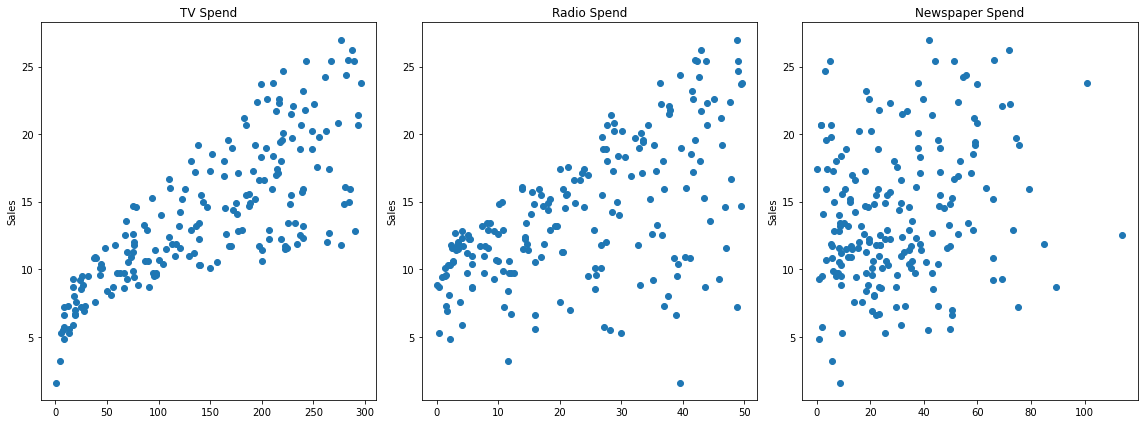

In [78]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

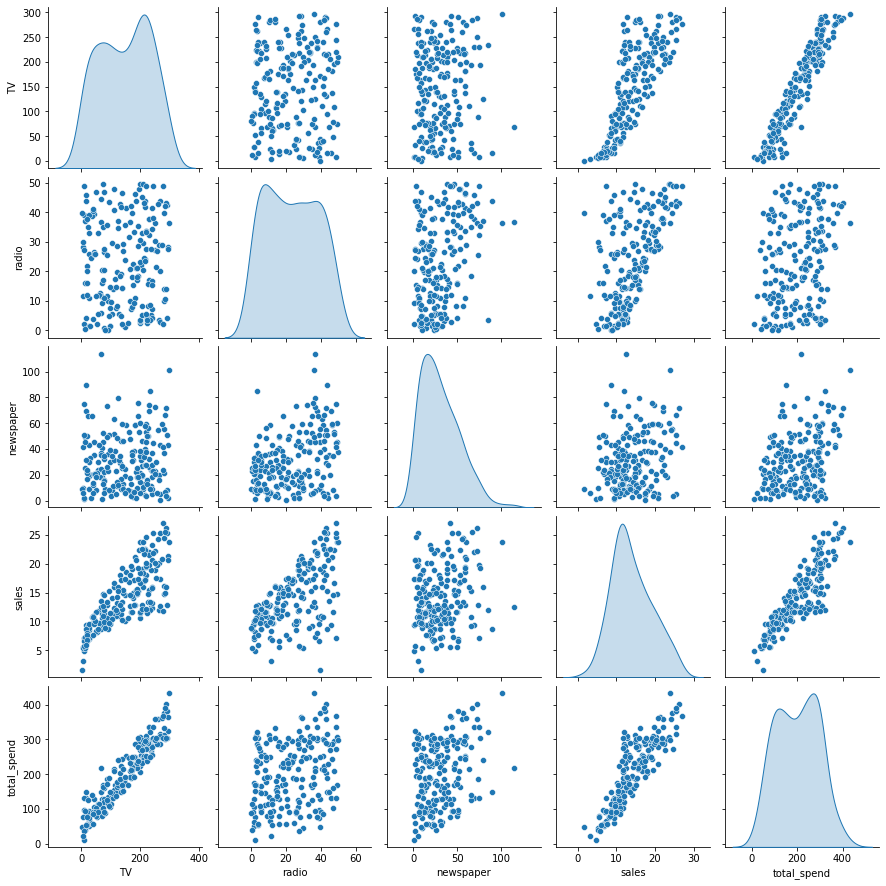

In [79]:
# Relationships between features
sns.pairplot(df,diag_kind='kde')

In [80]:
X = df.drop('sales',axis=1)
y = df['sales']

In [94]:
# Train and Test Spli
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [95]:
X_train

,TV,radio,newspaper,total_spend
85,193.2,18.4,65.7,277.3
183,287.6,43.0,71.8,402.4
127,80.2,0.0,9.2,89.4
53,182.6,46.2,58.7,287.5
100,222.4,4.3,49.8,276.5
...,...,...,...,...
63,102.7,29.6,8.4,140.7
70,199.1,30.6,38.7,268.4
81,239.8,4.1,36.9,280.8
11,214.7,24.0,4.0,242.7


In [96]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [97]:
X_test

,TV,radio,newspaper,total_spend
37,74.7,49.4,45.7,169.8
109,255.4,26.9,5.5,287.8
31,112.9,17.4,38.6,168.9
89,109.8,47.8,51.4,209.0
66,31.5,24.6,2.2,58.3
119,19.4,16.0,22.3,57.7
54,262.7,28.8,15.9,307.4
74,213.4,24.6,13.1,251.1
145,140.3,1.9,9.0,151.2
142,220.5,33.2,37.9,291.6


In [98]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
1      10.4
43     12.9
102    14.8
164    11.9
9      10.6
155     3.2
36     25.4
190    10.8
33     17.4
45     14.9
Name: sales, dtype: float64

# Creating a Model (Estimator)

In [99]:
from sklearn.linear_model import LinearRegression

In [102]:
#### Fit/Train the Model on the training data

##**Make sure you only fit to the training data, in order to fairly evaluate your model's performance on future data**

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [105]:
model.predict(X_test)

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])